In [1]:
from zipfile import ZipFile
import pandas as pd
import csv
import matplotlib.pyplot as plt
from scipy.signal import find_peaks



In [2]:
df = pd.read_csv("BatteryTableAllLogs.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])


In [17]:
df

,hostName,device,timestamp,temperature,voltage,current,capacity
0,44-4b-5d-01-04-19,HUB,2022-09-14 19:59:53,28,4058,0,100
1,44-4b-5d-01-04-19,HUB,2022-09-14 19:59:54,28,4058,0,100
2,44-4b-5d-01-04-19,HUB,2022-09-14 19:59:57,28,4058,0,100
3,44-4b-5d-01-04-19,HUB,2022-09-14 19:59:58,28,4058,0,100
4,44-4b-5d-01-04-19,HUB,2022-09-14 19:59:59,28,4058,0,100
...,...,...,...,...,...,...,...
8343272,44-4b-5d-01-04-79,HUB,2022-10-23 19:59:51,25,3740,-115,66
8343273,44-4b-5d-01-04-79,HUB,2022-10-23 19:59:52,25,3752,-93,66
8343274,44-4b-5d-01-04-79,HUB,2022-10-23 19:59:53,25,3752,-101,66
8343275,44-4b-5d-01-04-79,HUB,2022-10-23 19:59:54,25,3747,-93,66


In [4]:
unique_host = df['hostName'].unique()
unique_host

array(['44-4b-5d-01-04-19', '44-4b-5d-01-04-41', '44-4b-5d-01-04-29',
       '44-4b-5d-01-04-79', '44-4b-5d-01-04-a1', '44-4b-5d-01-04-91',
       '44-4b-5d-01-04-09', '44-4b-5d-01-04-51', '44-4b-5d-01-04-89',
       '44-4b-5d-01-04-21', '44-4b-5d-01-04-11', '44-4b-5d-01-04-81',
       '44-4b-5d-01-04-31', '44-4b-5d-01-04-b1', '44-4b-5d-01-04-01',
       '44-4b-5d-01-04-39'], dtype=object)

## Voltage Analysis


In [26]:
for i in range(len(unique_host)):
    host1_data = df[df['hostName'] == unique_host[i]]
    grouped_by_device = host1_data.groupby('device')

    good_standard_counts = grouped_by_device.apply(lambda x: ((x['voltage'] > 3200)).sum())
    bad_standard_counts = grouped_by_device.apply(lambda x: ((x['voltage'] < 2850) | (x['voltage'] > 4250)).sum())
    total_count = grouped_by_device.size()
    median_voltage = grouped_by_device['voltage'].median()

    print()
    print(f"Hostname: {unique_host[i]}")
    for device_type in good_standard_counts.index:
        
        total = total_count[device_type]
        good_count = good_standard_counts[device_type]
        bad_count = bad_standard_counts[device_type]
        good_rate = (good_count / total) * 100
        median = median_voltage[device_type]

        print(f"In {device_type}, {good_count}/{total} voltage are > 3200mV.") 
        print(f"{bad_count} battery voltages are considered as bad (<2850 or >4250).  The good rate is {good_rate:.2f}%. The median: {median}.")
        


Hostname: 44-4b-5d-01-04-19
In HUB, 859537/859539 voltage are > 3200mV.
0 battery voltages are considered as bad (<2850 or >4250).  The good rate is 100.00%. The median of the voltage is 3883.0.
In RESPSENSOR, 9833/9833 voltage are > 3200mV.
0 battery voltages are considered as bad (<2850 or >4250).  The good rate is 100.00%. The median of the voltage is 3823.0.
In SPO2SENSOR, 9847/9847 voltage are > 3200mV.
0 battery voltages are considered as bad (<2850 or >4250).  The good rate is 100.00%. The median of the voltage is 3810.0.

Hostname: 44-4b-5d-01-04-41
In HUB, 1072912/1072912 voltage are > 3200mV.
0 battery voltages are considered as bad (<2850 or >4250).  The good rate is 100.00%. The median of the voltage is 4033.0.

Hostname: 44-4b-5d-01-04-29
In HUB, 201659/201659 voltage are > 3200mV.
0 battery voltages are considered as bad (<2850 or >4250).  The good rate is 100.00%. The median of the voltage is 4052.0.
In RESPSENSOR, 7019/7019 voltage are > 3200mV.
0 battery voltages are 

## Voltage Visualization

In [5]:
SPO2 = df.loc[(df['hostName'] == unique_host[0]) & (df['device'] == 'SPO2SENSOR')].sort_values(by=['timestamp'])
RESP = df.loc[(df['hostName'] == unique_host[0]) & (df['device'] == 'RESPSENSOR')].sort_values(by=['timestamp'])
HUB = df.loc[(df['hostName'] == unique_host[0]) & (df['device'] == 'HUB')].sort_values(by=['timestamp'])

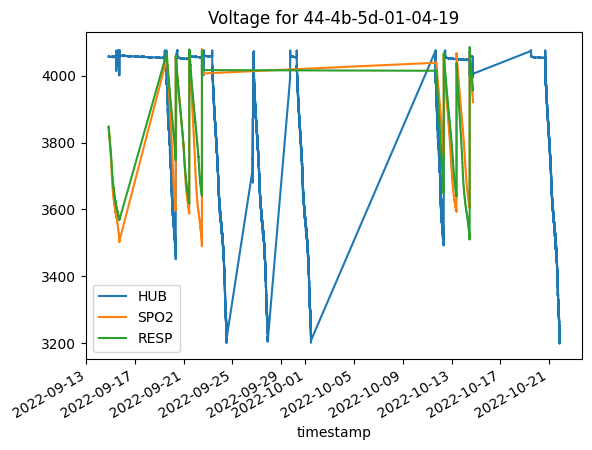

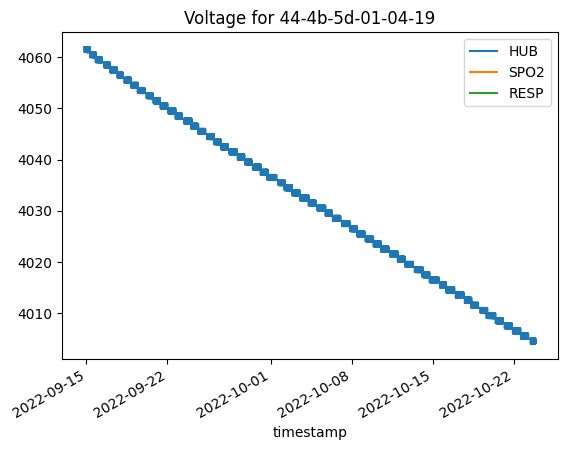

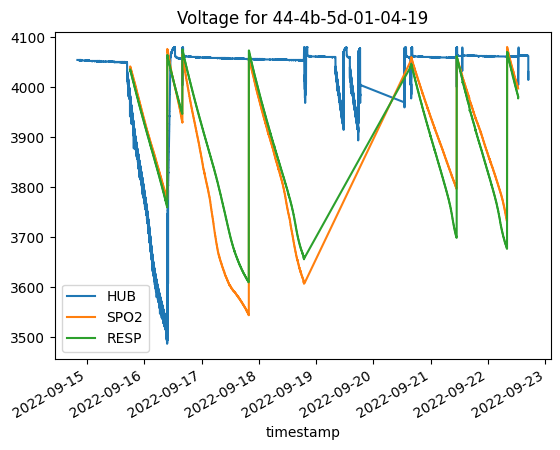

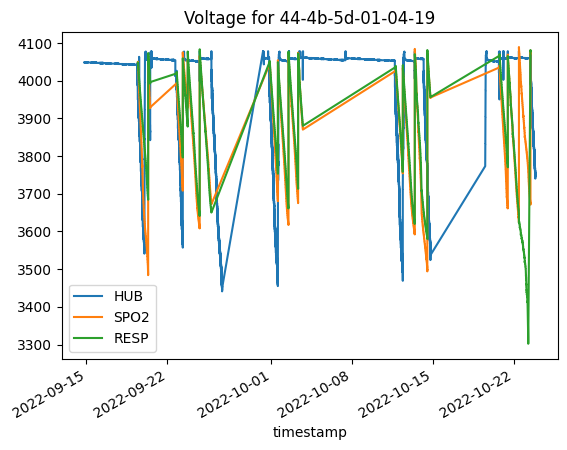

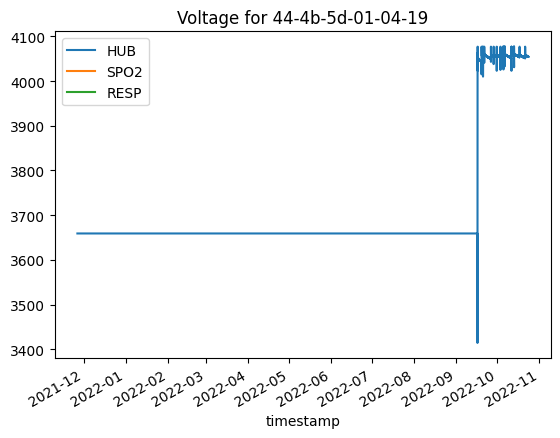

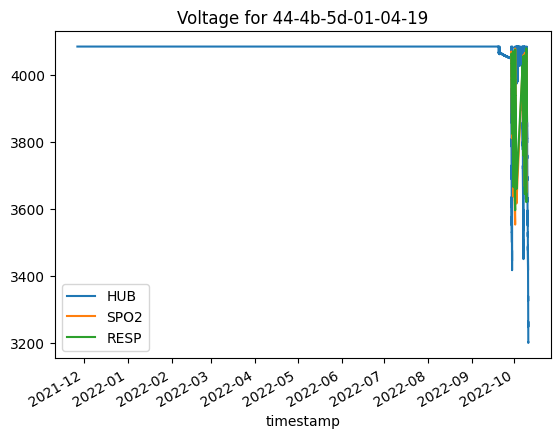

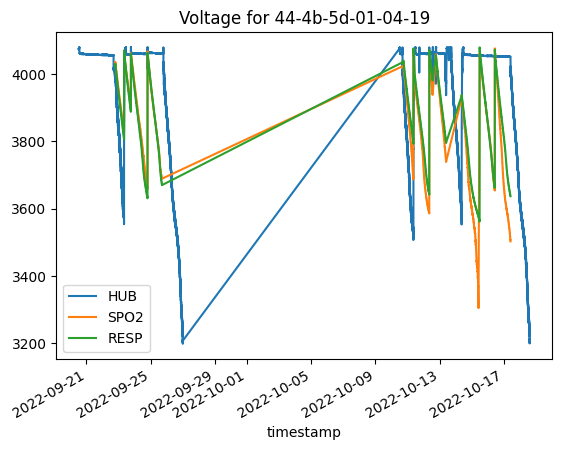

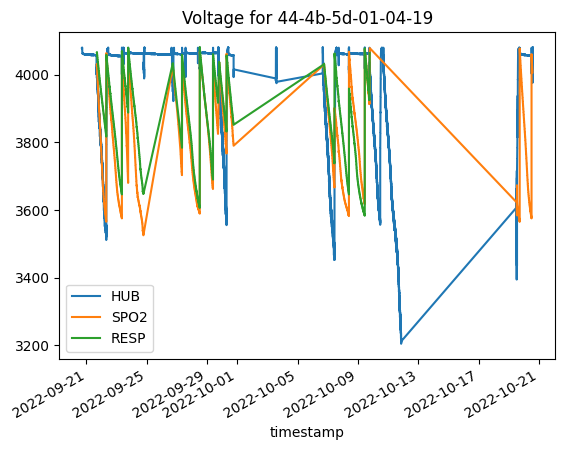

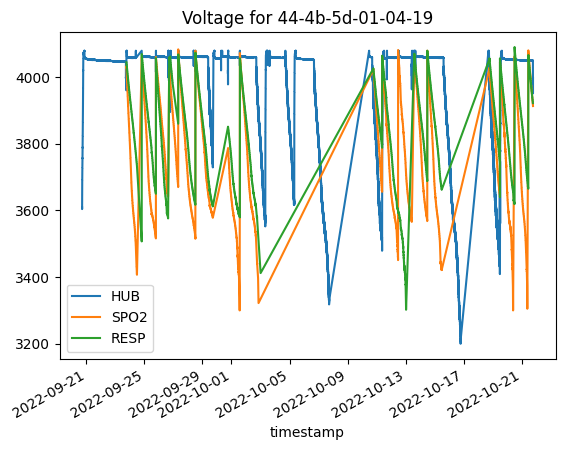

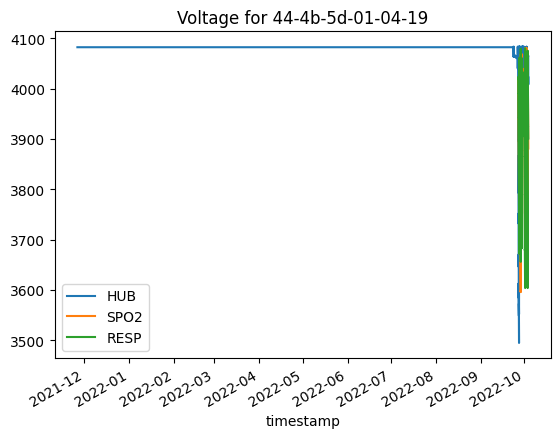

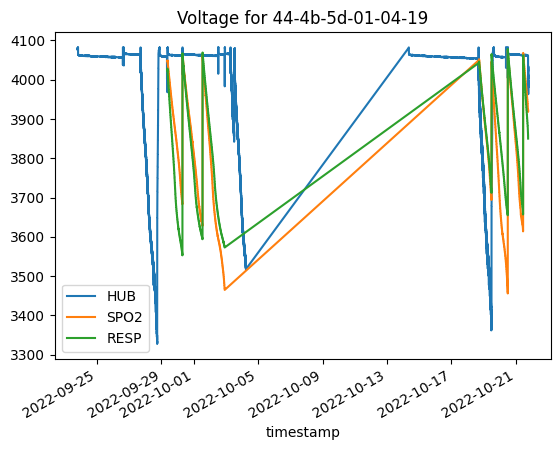

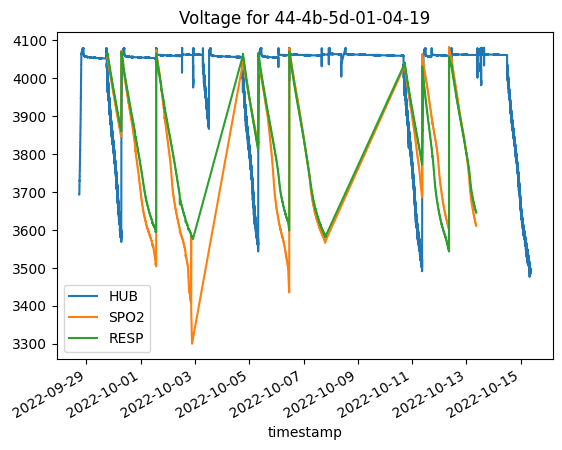

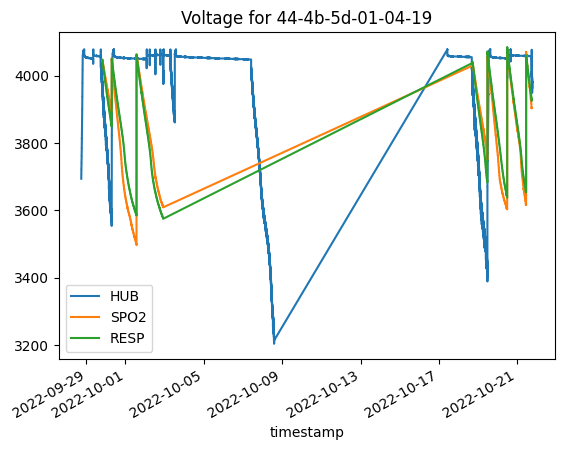

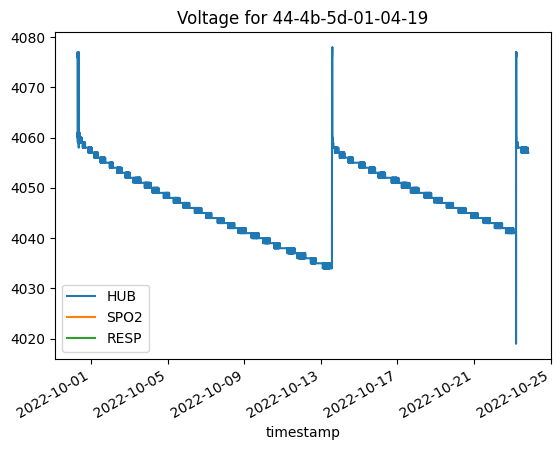

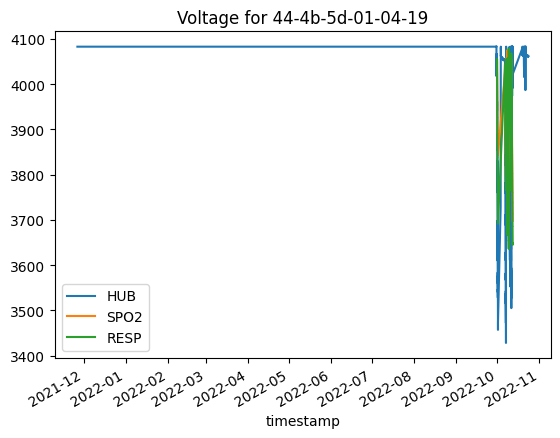

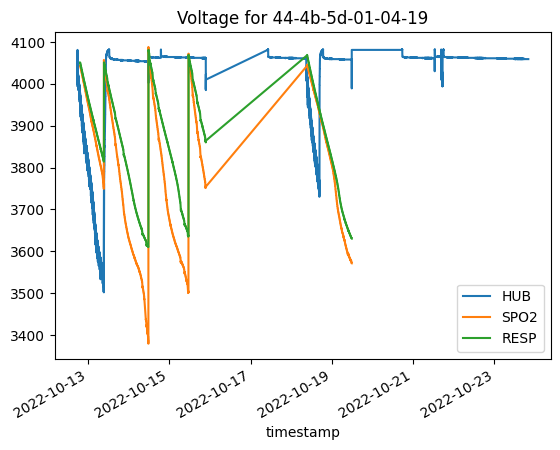

In [21]:
for i in range(len(unique_host)):
    # Create a figure and an axes object
    SPO2 = df.loc[(df['hostName'] == unique_host[i]) & (df['device'] == 'SPO2SENSOR')].sort_values(by=['timestamp'])
    RESP = df.loc[(df['hostName'] == unique_host[i]) & (df['device'] == 'RESPSENSOR')].sort_values(by=['timestamp'])
    HUB = df.loc[(df['hostName'] == unique_host[i]) & (df['device'] == 'HUB')].sort_values(by=['timestamp'])

    fig, ax = plt.subplots()

    # Plot each dataset on the same axes object
    HUB.plot(x='timestamp', y='voltage', ax=ax, label='HUB')
    SPO2.plot(x='timestamp', y='voltage', ax=ax, label='SPO2')
    RESP.plot(x='timestamp', y='voltage', ax=ax, label='RESP')

    # Setting the title to include the host variable
    ax.set_title(f'Voltage for {unique_host[0]}')

    # Adding legend to differentiate the lines
    ax.legend()

    # Show the plot
    plt.show()

For host 44-4b-5d-01-04-01, it seems that the data points are concentrated at the end of the time range. Here's another graph focus on the time range of September to October 2022

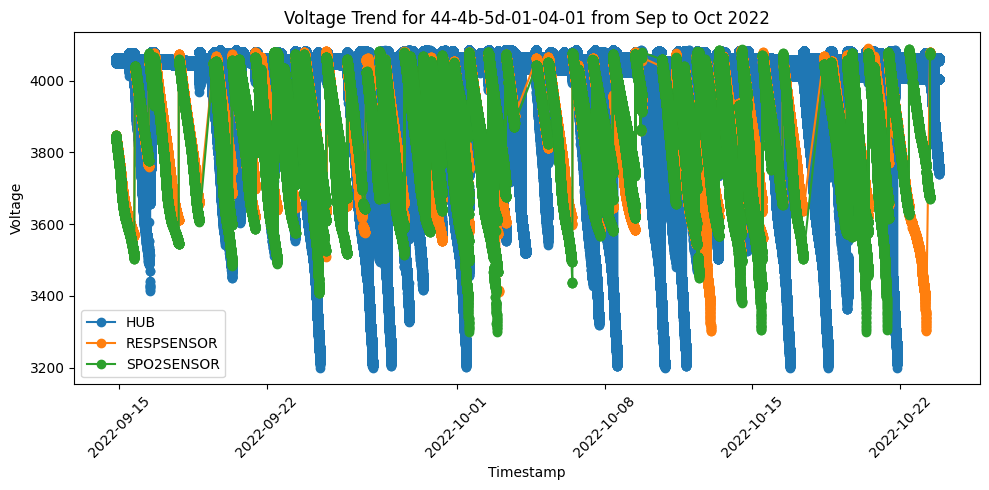

In [24]:
host_data = df[df['hostName'] == '44-4b-5d-01-04-01']
start_date = "2022-09-01"
end_date = "2022-11-01"

filtered_df = df[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)]
grouped_filtered = filtered_df.groupby('device')

fig, ax = plt.subplots(figsize=(10, 5))

for name, group in grouped_filtered:
    ax.plot(group['timestamp'], group['voltage'], marker='o', label=name)

ax.set_title(f'Voltage Trend for 44-4b-5d-01-04-01 from Sep to Oct 2022')
ax.set_xlabel('Timestamp')
ax.set_ylabel('Voltage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()

plt.show()

/var/folders/qm/w7f8y2y92dd90qvxq4hlyt6m0000gn/T/ipykernel_11852/1294738489.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['voltage_smooth'] = filtered_df['voltage'].rolling(window=5).mean()


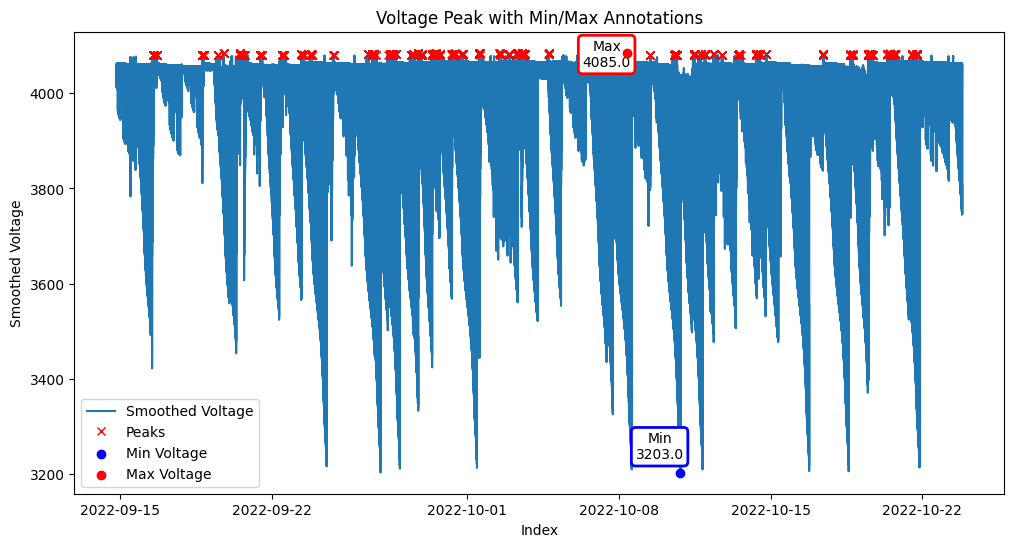

2022-10-10 20:08:48 3203.0


In [9]:
start_date = "2022-09-01"
end_date = "2022-11-01"
filtered_df = df[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)]

filtered_df['voltage_smooth'] = filtered_df['voltage'].rolling(window=5).mean()
peaks, _ = find_peaks(filtered_df['voltage_smooth'], height=4080, distance=50)

min_voltage = filtered_df['voltage_smooth'].min()
max_voltage = filtered_df['voltage_smooth'].max()
min_idx = filtered_df['voltage_smooth'].idxmin()
max_idx = filtered_df['voltage_smooth'].idxmax()

plt.figure(figsize=(12, 6))
plt.plot(filtered_df['timestamp'], filtered_df['voltage_smooth'], label='Smoothed Voltage')
plt.plot(filtered_df['timestamp'].iloc[peaks], filtered_df['voltage_smooth'].iloc[peaks], 'rx', label='Peaks')
plt.scatter(filtered_df['timestamp'].iloc[min_idx], min_voltage, color='blue', label='Min Voltage', zorder=5)
plt.scatter(filtered_df['timestamp'].iloc[max_idx], max_voltage, color='red', label='Max Voltage', zorder=5)
min_text_pos = (-15, -10) if min_voltage > (min_voltage + max_voltage) / 2 else (-15, 10)
max_text_pos = (-15, 10) if max_voltage < (min_voltage + max_voltage) / 2 else (-15, -10)

plt.annotate(f'Min\n{min_voltage}', (filtered_df['timestamp'].iloc[min_idx], min_voltage), textcoords="offset points", xytext=min_text_pos, ha='center', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=2))
plt.annotate(f'Max\n{max_voltage}', (filtered_df['timestamp'].iloc[max_idx], max_voltage), textcoords="offset points", xytext=max_text_pos, ha='center', arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="r", lw=2))

plt.title('Voltage Peak with Min/Max Annotations')
plt.xlabel('Index')
plt.ylabel('Smoothed Voltage')
plt.legend()
plt.show()


print(filtered_df['timestamp'].iloc[min_idx],min_voltage)